In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Reading in the CSV file
df = pd.read_csv('hpi_master.csv')
df.head()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.87,100.87
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.33,100.90
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.73,100.97
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.32,101.31


In [17]:
# Filtering for the top 5 cities in the US
cities = ["Houston", "Phoenix", "Los Angeles", "Chicago", "New York"]
pattern = "|".join(cities)
filtered_df = df[df['place_name'].str.contains(pattern, case=False, na=False)]
filtered_df.head()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
16296,traditional,all-transactions,quarterly,MSA,"Chicago-Naperville-Schaumburg, IL (MSAD)",16984,1975,3,30.28,NaN
16297,traditional,all-transactions,quarterly,MSA,"Chicago-Naperville-Schaumburg, IL (MSAD)",16984,1975,4,31.04,NaN
16298,traditional,all-transactions,quarterly,MSA,"Chicago-Naperville-Schaumburg, IL (MSAD)",16984,1976,1,31.33,NaN
16299,traditional,all-transactions,quarterly,MSA,"Chicago-Naperville-Schaumburg, IL (MSAD)",16984,1976,2,32.23,NaN
16300,traditional,all-transactions,quarterly,MSA,"Chicago-Naperville-Schaumburg, IL (MSAD)",16984,1976,3,34.28,NaN


In [18]:
# Displaying one row per place_name
place_df = filtered_df.drop_duplicates(subset='place_name', keep='first')
place_df.head()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
16296,traditional,all-transactions,quarterly,MSA,"Chicago-Naperville-Schaumburg, IL (MSAD)",16984,1975,3,30.28,NaN
31845,traditional,all-transactions,quarterly,MSA,"Houston-Pasadena-The Woodlands, TX",26420,1976,1,51.49,NaN
41270,traditional,all-transactions,quarterly,MSA,"Los Angeles-Long Beach-Glendale, CA (MSAD)",31084,1975,1,20.47,NaN
48559,traditional,all-transactions,quarterly,MSA,"New York-Jersey City-White Plains, NY-NJ (MSAD)",35614,1975,4,24.00,NaN
52433,traditional,all-transactions,quarterly,MSA,"Phoenix-Mesa-Chandler, AZ",38060,1977,2,42.60,NaN


In [19]:
# Check for missing values in 'index_sa'
missing_count = filtered_df['index_sa'].isna().sum()
missing_percent = (missing_count / len(filtered_df)) * 100
print(f"Missing values in index_sa: {missing_count}")
print(f"Percentage missing: {missing_percent:.2f}%")

Missing values in index_sa: 1316
Percentage missing: 38.87%


In [ ]:
# The length of the filtered dataframe
len(filtered_df)

3386

In [ ]:
# Finding the smallest values in 'index_nsa' and 'index_sa'
min_index_nsa = filtered_df['index_nsa'].min()
min_index_sa = filtered_df['index_sa'].min()
print(f"Smallest value in index_nsa: {min_index_nsa}")
print(f"Smallest value in index_sa: {min_index_sa}")

Smallest value in index_nsa: 20.47
Smallest value in index_sa: 74.79


In [25]:
# Filtered just for each city
houston = filtered_df[filtered_df['place_name'].str.contains("Houston", case=False, na=False)]
la = filtered_df[filtered_df['place_name'].str.contains("Los Angeles", case=False, na=False)]
ny = filtered_df[filtered_df['place_name'].str.contains("New York", case=False, na=False)]
chicago = filtered_df[filtered_df['place_name'].str.contains("Chicago", case=False, na=False)]
phoenix = filtered_df[filtered_df['place_name'].str.contains("Phoenix", case=False, na=False)]

In [26]:
houston.head(10)

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
31845,traditional,all-transactions,quarterly,MSA,"Houston-Pasadena-The Woodlands, TX",26420,1976,1,51.49,NaN
31846,traditional,all-transactions,quarterly,MSA,"Houston-Pasadena-The Woodlands, TX",26420,1976,2,58.52,NaN
31847,traditional,all-transactions,quarterly,MSA,"Houston-Pasadena-The Woodlands, TX",26420,1976,3,58.43,NaN
31848,traditional,all-transactions,quarterly,MSA,"Houston-Pasadena-The Woodlands, TX",26420,1976,4,58.24,NaN
31849,traditional,all-transactions,quarterly,MSA,"Houston-Pasadena-The Woodlands, TX",26420,1977,1,60.04,NaN
31850,traditional,all-transactions,quarterly,MSA,"Houston-Pasadena-The Woodlands, TX",26420,1977,2,66.97,NaN
31851,traditional,all-transactions,quarterly,MSA,"Houston-Pasadena-The Woodlands, TX",26420,1977,3,64.43,NaN
31852,traditional,all-transactions,quarterly,MSA,"Houston-Pasadena-The Woodlands, TX",26420,1977,4,67.98,NaN
31853,traditional,all-transactions,quarterly,MSA,"Houston-Pasadena-The Woodlands, TX",26420,1978,1,69.94,NaN
31854,traditional,all-transactions,quarterly,MSA,"Houston-Pasadena-The Woodlands, TX",26420,1978,2,75.31,NaN


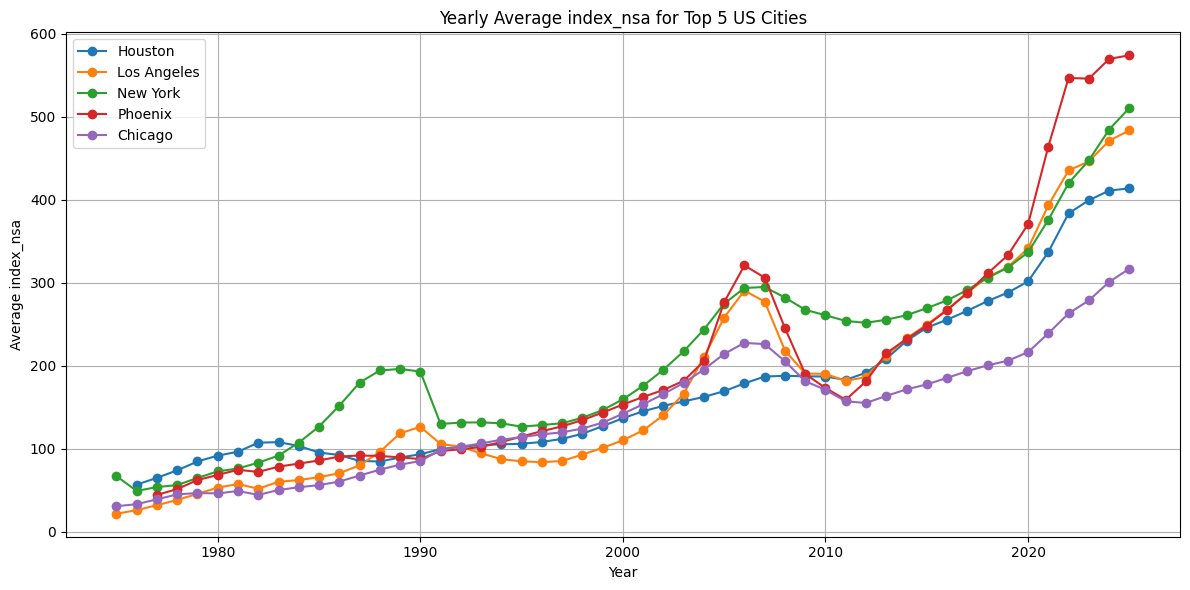

In [36]:
houston_yearly = houston.groupby('yr')['index_nsa'].mean().reset_index()
la_yearly = la.groupby('yr')['index_nsa'].mean().reset_index()
ny_yearly = ny.groupby('yr')['index_nsa'].mean().reset_index()
phoenix_yearly = phoenix.groupby('yr')['index_nsa'].mean().reset_index()
chicago_yearly = chicago.groupby('yr')['index_nsa'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(houston_yearly['yr'], houston_yearly['index_nsa'], marker='o', label='Houston')
plt.plot(la_yearly['yr'], la_yearly['index_nsa'], marker='o', label='Los Angeles')
plt.plot(ny_yearly['yr'], ny_yearly['index_nsa'], marker='o', label='New York')
plt.plot(phoenix_yearly['yr'], phoenix_yearly['index_nsa'], marker='o', label='Phoenix')
plt.plot(chicago_yearly['yr'], chicago_yearly['index_nsa'], marker='o', label='Chicago')

plt.xlabel('Year')
plt.ylabel('Average index_nsa')
plt.title('Yearly Average index_nsa for Top 5 US Cities')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

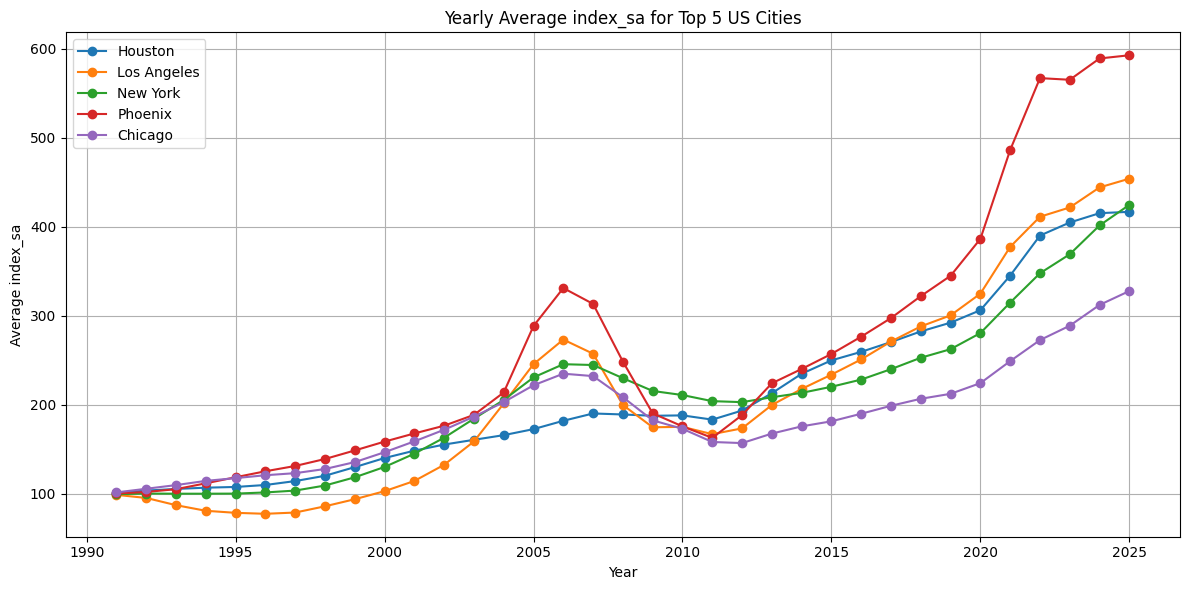

In [38]:
houston_yearly_sa = houston.groupby('yr')['index_sa'].mean().reset_index()
la_yearly_sa = la.groupby('yr')['index_sa'].mean().reset_index()
ny_yearly_sa = ny.groupby('yr')['index_sa'].mean().reset_index()
phoenix_yearly_sa = phoenix.groupby('yr')['index_sa'].mean().reset_index()
chicago_yearly_sa = chicago.groupby('yr')['index_sa'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(houston_yearly_sa['yr'], houston_yearly_sa['index_sa'], marker='o', label='Houston')
plt.plot(la_yearly_sa['yr'], la_yearly_sa['index_sa'], marker='o', label='Los Angeles')
plt.plot(ny_yearly_sa['yr'], ny_yearly_sa['index_sa'], marker='o', label='New York')
plt.plot(phoenix_yearly_sa['yr'], phoenix_yearly_sa['index_sa'], marker='o', label='Phoenix')
plt.plot(chicago_yearly_sa['yr'], chicago_yearly_sa['index_sa'], marker='o', label='Chicago')

plt.xlabel('Year')
plt.ylabel('Average index_sa')
plt.title('Yearly Average index_sa for Top 5 US Cities')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()